<a href="https://colab.research.google.com/github/Texmo100/Fashion_MNIST_DeepLearning_Python/blob/main/Fashion_MNIST_DeepLearning_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST 👚

---

#### Step 0: Understand the problem

The Dataset consists of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. Since we have categories, that means que can train a Deep Learning Neural Network to perfom a multi-classification task.

<br/>

The following list represents the labels for each category:

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9. Ankle boot

<br/>

---

#### Step 1: Collect the data

In [ ]:
import keras
from keras import datasets


(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


---

#### Step 2: Analize the data

In [ ]:
def set_describer(set_name, data):
  """
  Describes the most basic information about a set

  Args:
    set_name (string): The set identifier
    data (ndarray) (uint8): This contains the set

  Returns:
    No resturns

  """

  desc_labels = {
      0: 'Set datatype',
      1: 'Sets shape',
      2: 'first samples data type',
      3: 'first samples shape',
  }

  print(f'---- {set_name}')

  description = [
    type(data),
    data.shape,
    type(data[0]),
    data[0].shape,
  ]

  for index, item in enumerate(description):
    print(f'-- {desc_labels[index]}: {item}')
  print('\n')


# Using the set_describer function to visualize the description of each set
set_describer("Training data", x_train)
set_describer("Training labels", y_train)
set_describer("Testing data", x_test)
set_describer("Testing labels", y_test)


---- Training data
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (60000, 28, 28)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (28, 28)


---- Training labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (60000,)
-- first samples data type: <class 'numpy.uint8'>
-- first samples shape: ()


---- Testing data
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000, 28, 28)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (28, 28)


---- Testing labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000,)
-- first samples data type: <class 'numpy.uint8'>
-- first samples shape: ()




---

#### Step 3: Clean and perfom feature engineering (if neccessary)

The dataset is already curated. However, we noticed that our labels are in numerical format, we need to decide if keep it as is, or opt to one-hot encoded format. Since this is a showcase, we will opt to one-hot encoding for pure demonstration.

In [ ]:
import numpy as np

def one_hot_encoder(labels, number_labels):
  """
  It converts labels in numerical format (0 to n) to one-hot encoded format for better data manipulation

  Args:
    labels (ndarray) (uint8): It contains the labels in numerical format
    number_labels (int): Number of categories defined for the problem at hand

  Returns:
    labels (ndarray) (float32): It contains the labels in one-hot encoded format

  """

  labels_shape = labels.shape[0]
  one_hot_array = np.zeros((labels_shape, number_labels))

  for index, zero_array in enumerate(one_hot_array):
    label_index = labels[index]
    zero_array[label_index] = 1.

  return one_hot_array.astype(np.float32)


# Convert numerical labels into one-hot encoded labels using the one_hot_encoder function
one_hot_y_train = one_hot_encoder(y_train, 10)

print(y_train[0])
print(one_hot_y_train[0])
set_describer('Training labels', one_hot_y_train)

one_hot_y_test = one_hot_encoder(y_test, 10)

print(y_test[0])
print(one_hot_y_test[0])
set_describer('Testing labels', one_hot_y_test)


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
---- Training labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (60000, 10)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (10,)


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
---- Testing labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000, 10)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (10,)




---

#### Step 4: Prepare the data

In [ ]:
x_train = x_train.reshape((60000, 28*28))
x_train = x_train.astype(np.float32) / 255
set_describer('Training set', x_train)

x_test = x_test.reshape((10000, 28*28))
x_test = x_test.astype(np.float32) / 255
set_describer('Testing set', x_test)


---- Training set
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (60000, 784)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (784,)


---- Testing set
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000, 784)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (784,)




---

#### Step 5: Split the validation data

In [ ]:
validation_samples = 10000

# Splitting the training set and labels
partial_x_train = x_train[validation_samples:]
partial_y_train = one_hot_y_train[validation_samples:]

set_describer('partial training data', partial_x_train)
set_describer('partial labels', partial_y_train)

# Splitting the valdiation set and labels
x_val = x_train[:validation_samples]
y_val = one_hot_y_train[:validation_samples]

set_describer('validation data', x_val)
set_describer('validation labels', y_val)



---- partial training data
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (50000, 784)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (784,)


---- partial labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (50000, 10)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (10,)


---- validation data
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000, 784)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (784,)


---- validation labels
-- Set datatype: <class 'numpy.ndarray'>
-- Sets shape: (10000, 10)
-- first samples data type: <class 'numpy.ndarray'>
-- first samples shape: (10,)




---

#### Step 6: Build the model
<br/>
Since the problem is not very complex, we will be using the Sequential API to build our model.

In [ ]:
from keras import layers

model = keras.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

---

#### Step 7: Compile the model

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)


---

#### Step 8: Train the model

In [ ]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    validation_data = (x_val, y_val),
    epochs=10,
    batch_size=128
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3060 - loss: 2.2491 - val_accuracy: 0.4928 - val_loss: 1.8703
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5176 - loss: 1.7228 - val_accuracy: 0.5855 - val_loss: 1.3643
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5978 - loss: 1.3035 - val_accuracy: 0.6413 - val_loss: 1.1151
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6494 - loss: 1.0816 - val_accuracy: 0.6869 - val_loss: 0.9662
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6891 - loss: 0.9470 - val_accuracy: 0.7110 - val_loss: 0.8653
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7130 - loss: 0.8509 - val_accuracy: 0.7245 - val_loss: 0.7991
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7233 - loss: 0.7866 - val_accuracy: 0.7336 - val_loss: 0.7566
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7311 - loss: 0.7477 - val_accuracy: 0.

---

#### Step 9: Visualize the models accuracy and loss values

In [ ]:
history_dict = history.history

# Getting the accuracy and valdiation accuracy form the history dictionary
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# Getting the loss and validation loss from the history dictionary
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Calculate the number of epochs
epochs = range(1, len(accuracy) + 1)


range(1, 11)


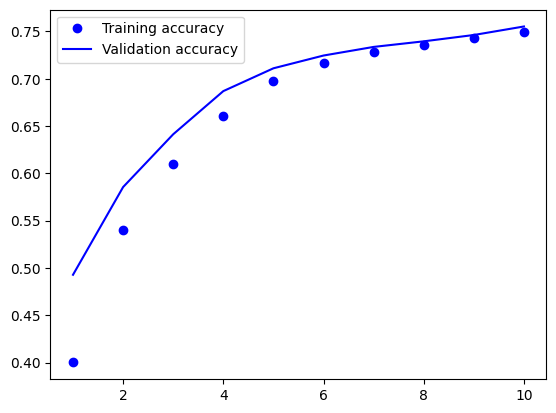

In [ ]:
import matplotlib.pyplot as plt

plt.clf()

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')

plt.title = 'Accuracy and validation accuracy'
plt.xlabel = 'epochs'
plt.ylabel = 'Accuracy_values'
plt.legend()
plt.show()


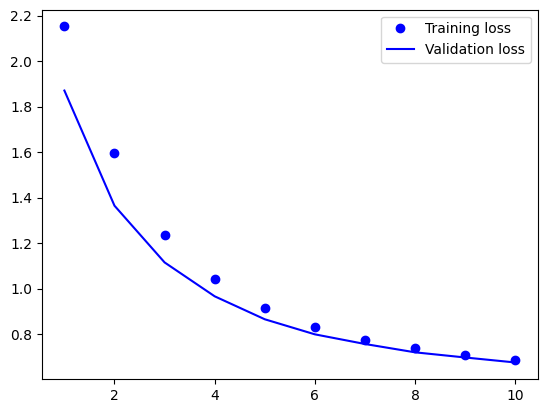

In [ ]:
plt.clf()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')

plt.title = 'Loss and validation loss'
plt.xlbale = 'epochs'
plt.ylabel = 'loss_values'
plt.legend()
plt.show()


---

#### Step 10: Make predictions with the trained model

In [ ]:
predictions = model.predict(x_test)

target_prediction = 5

print(predictions[target_prediction])
print(y_test[target_prediction])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[0.         0.99999994 0.         0.         0.         0.
 0.         0.         0.         0.        ]
1


---